#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data Loading

In [ ]:
iris = pd.read_csv('/content/IRIS.csv')

#Data Preprocessing

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.duplicated().sum()

3

In [ ]:
iris=iris.drop_duplicates()
iris.duplicated().sum()

0

#Visualization

Text(0.5, 1.0, 'Distribution of Species')

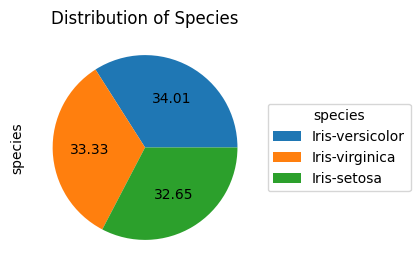

In [ ]:
plt.figure(figsize=(5,3))
iris["species"].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(iris["species"].value_counts().index, title="species", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Species")

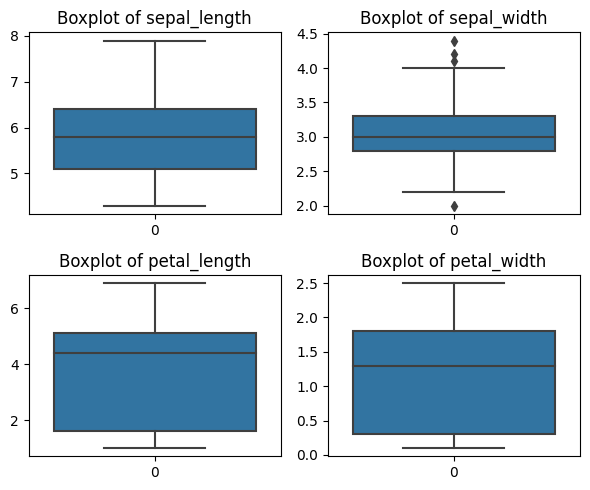

In [ ]:
l=['sepal_length','sepal_width','petal_length','petal_width']
plt.figure(figsize=(6,5))
for i in l:
    plt.subplot(2, 2, l.index(i) + 1)   # 2 rows , 2 columns
    sns.boxplot(iris[i])
    plt.title(f"Boxplot of {i}")
plt.tight_layout()

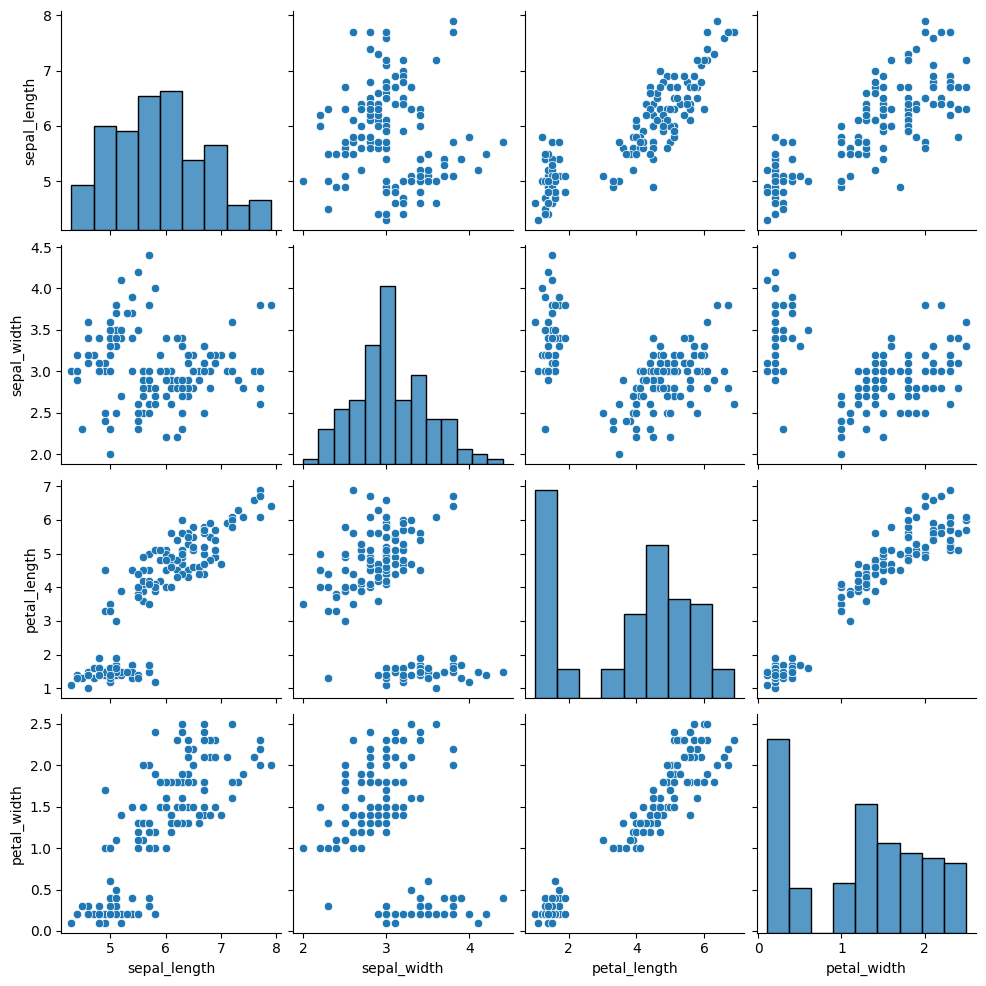

In [ ]:
sns.pairplot(iris)
plt.show()

The pair plot and box plots clearly show that the three species of Iris flowers have distinct characteristics in terms of sepal length, sepal width, petal length, and petal width. Setosa typically has shorter sepal and petal lengths but wider sepals, while Virginica has longer sepals and petals compared to the other two species. Versicolor falls in between Setosa and Virginica in terms of these measurements.


These visualizations helped in understanding the relationships and differences between Iris species and features, making it easier to classify and analyze these flowers based on their measurements.

In [ ]:
iris["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Encoding

In [ ]:
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
iris["species"]=iris["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

#Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

KNN

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)
model1

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


Logistic Regression

In [ ]:
model2=LogisticRegression(max_iter=1000) # Increase the max_iter value
model2

LogisticRegression(max_iter=1000)

In [ ]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


Decision Tree

In [ ]:
model3=DecisionTreeClassifier() # Increase the max_iter value
model3

DecisionTreeClassifier()

In [ ]:
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


Comparison of accuracies

In [ ]:
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred3)*100)

KNN Classifier Accuracy: 93.33333333333333
Logistic Regression Accuracy: 93.33333333333333
Decision Tree Accuracy: 96.66666666666667


In [ ]:
# Enter : PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
sample_check=[[5.8,2.7,3.9,1.2],
              [7.7,2.8,6.7,2],
              [7.9,3.8,6.4,2],
              [5,3.4,1.5,0.2],
              [4.8,3.4,1.9,0.2]
             ]
for i in sample_check:
    x=model3.predict([i])
    if(x==0):
        print("Iris-setosa")
    elif(x==1):
        print("Iris-versicolor")
    elif(x==2):
        print("Iris-virginica")

Iris-versicolor
Iris-virginica
Iris-virginica
Iris-setosa
Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
